## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#read the dataset
df = pd.read_csv('ab_data.csv')
#show first 5 rows
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
#number of rows
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
#number of unique users in the dataset
len(df.user_id.unique())

290584

d. The proportion of users converted.

In [5]:
#proportion of users who converted
len(df.query('converted == 1'))/df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
len(df.query('landing_page == "new_page" & group == "control"')) + len(df.query('landing_page == "old_page" & group == "treatment"'))

3893

f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#rows where treatment group does not match new page
index_names_1 = df[ (df['landing_page'] != "new_page") & (df['group'] == 'treatment')].index 

#rows where control group does not match old page
index_names_2 = df[ (df['landing_page'] == "new_page") & (df['group'] != 'treatment')].index 


In [9]:
#drop the rows where treatment group does not match new page from the new dataframe
df2 = df.drop(index_names_1)

In [10]:
#drop the rows where control group does not match old page from the new dataframe
df2.drop(index_names_2, inplace=True)

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]


0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
len(df2['user_id'].unique())

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
duplicated = df2[df2.duplicated(['user_id'])]
duplicated['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [15]:
duplicated

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
#drop one of the rows with duplicated user id
df2.drop_duplicates(subset='user_id',inplace=True)


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
len(df2.query('converted== 1'))/df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
control = df2.query('group == "control"')
len(control.query('converted == 1'))/control.shape[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
treatment = df2.query('group =="treatment"')
len(treatment.query('converted==1'))/treatment.shape[0]

0.11880806551510564

d. What is the probability that an individual received the new page?

In [20]:
len(df2.query('landing_page== "new_page"'))/df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**From what we've seen so far, the conversion rate for users who recieved the new page is slightly less than the general conversion rate regardless of the page, as well as the conversion rate for users who recieved the old page.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null Hypothesis: The conversion rate for the new page is equal to or less than that of the old page.**

**Alternative Hypothsis: The conversion rate for the new page is higher than that of the old page.**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [21]:
#the conversion rate assuming that the conversion rate is the same for either landing pages
new_rate = len(df2.query( 'converted == 1'))/len(df2.index)
new_rate

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [22]:
#the conversion rate assuming that the conversion rate is the same for either landing pages
old_rate = len(df2.query('converted == 1'))/ len(df2.index)
old_rate

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [23]:
new_df = df2.query('landing_page == "new_page"')
n_new = len(new_df[new_df['group']=='treatment']['user_id'].unique())
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [24]:
old_df = df2.query('landing_page == "old_page"')
n_old = len(old_df[old_df['group']=='control']['user_id'].unique())
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
new_page_converted = np.random.choice([0, 1], n_new, p = [new_rate, 1-new_rate])


f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
old_page_converted = np.random.choice([0, 1], n_old, p = [old_rate, 1-old_rate])


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
diff = new_page_converted - new_page_converted
diff.mean()

0.0

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [28]:
#creat 10000 simulation samples of the new page under the cnversion rate of the new page
#store the mean value of these simulations in a list
new_page_converted = np.random.binomial(n_new, new_rate, 10000)/n_new
#creat 10000 simulation samples of the old page under the cnversion rate of the old page
#store the mean value of these simulations in a list
old_page_converted = np.random.binomial(n_old, old_rate, 10000)/n_old
#store the differences in means in a list called p_diffs
p_diffs = new_page_converted - old_page_converted

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

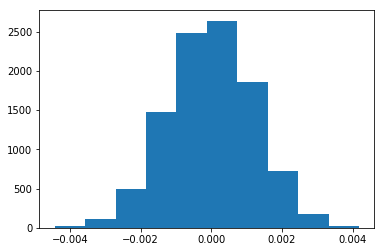

In [29]:
#transform the list to a numpy array
p_diffs = np.array(p_diffs)
#visualize the distribution in a histogram
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
#store the observed difference in means between the conversion rates for the new and old pages in the original dataset
obs_diff = new_df.converted.mean() - old_df.converted.mean()

#creat an empty list to store the values in p_diffs that are greater than the observed difference
j = []
#iterate over the values in p_diffs
for x in p_diffs:
    if x > obs_diff:
        #append the values that are greater than the observed difference in the empty list
        j.append(x)
#calculate the proportion of values that are greater than the observed difference in the p_diffs list to find the p-value        
p_value = len(j) / len(p_diffs)
p_value
    

0.9022

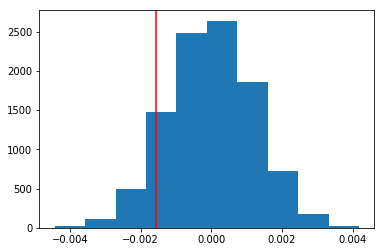

In [31]:
plt.hist(p_diffs);
#visualize the line of the observed difference in the dataset within the distribution of differences under the null
plt.axvline(obs_diff, c='red');

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**What we've calculated in part j is the probability of type 1 error occuring under the alternative hypothesis or the P-value. Here we can observe that the p-value is higher than the alpha value of 5% threshold for type 1 error. This means that we fail to reject the null hypothesis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm

convert_old = df2[df2['landing_page']=="old_page"]['converted'].sum()
convert_new = df2[df2['landing_page']=="new_page"]['converted'].sum()
n_old = df2[df2['landing_page']=='new_page']['user_id'].shape[0]
n_new = df2[df2['landing_page']=='old_page']['user_id'].shape[0]


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [33]:
z_score , p_value = sm.stats.proportions_ztest([convert_old, convert_new],[n_old,n_new],alternative='smaller')
z_score , p_value

(1.2616957421858055, 0.89647085519672265)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The p-value we calculated through the z-test method in the statsmodel package agrees with what we found earlier in parts j and k. The probability of type 1 errors occuring under the alternative hypothesis is significantly higher than the threshold of alpha value of 5%. This means that we fail to reject the null hypothesis. In our context, this means that there is no sufficient proof that the landing page affects the conversion rate of the users in the dataset.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
#creat an intercept column
df2['intercept'] = 1
#get dummy variable for the landing page column
df2[['ab_page','old_page']] = pd.get_dummies(df2['landing_page'])
#drop the old page column, as one column is sufficient in giving us the info we want
df2.drop('old_page',axis=1, inplace=True)
df2.head()


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [35]:
#instantiate the logistic regression model with the intercept and landing page as our explanatory variables
lr = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
#fit the model
result = lr.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
#show summary results of our model
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-01-12 01:32 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The p-value of the landing page variable shown here in our logistic regression model summary is 0.1899. The difference between the p-value here and the p-value we calculated earlier is that the null hypothesis for the regression model is that the conversion rate in both the new and old page is equal. while in partII, the null hypothesis is that the conversion rate for the old page is higher than or equal to the new page.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Adding other factors might be useful in improving the performance of our model. On the other hand, adding more explanatory variables might cause issues such as multicolinearity. Which means that the some variables might be linearily related to each other, which might cause problems with the summary coefficients.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [37]:
#load country dataset
df_countries = pd.read_csv('countries.csv')
#merge the two datasets based on the user id
df2 = df2.join(df_countries.set_index('user_id'), on='user_id')
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [38]:
#get the dummy variable for the country column
df2[['CA','UK','US']] = pd.get_dummies(df2['country'])

#instantiate the model using the intercept and the 2 of the country dummy variable columns as our explanatory variables
lr2 = sm.Logit(df2['converted'],df2[['intercept','CA','UK']])
#fit the model
result2 = lr2.fit()
#show summary stats for our model
result2.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-01-12 01:32 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
CA           -0.0408    0.0269    -1.5178  0.1291  -0.0935   0.0119
UK            0.0099    0.0133     0.7458  0.4558  -0.0161   0.0360
==================================================================

"""

**according to our logistic regression model using the country as explanatory variable to predict the conversion rate as our response variable. The country variable does not seem to be a very good explanatory variable for the conversion of users in our dataset. We came to this conclusion by looking at the p-value of the country variables, which neither of them is equal to zero.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [42]:
#creat columns holding the interacted values of country and page for Canada and UK
df2['page_CA'] = df2['ab_page']*df2['CA']
df2['page_UK'] = df2['ab_page']*df2['UK']

#instantiate a new model with the intercept and the interaction columns as our explanatory variables
lr3 = sm.Logit(df2['converted'],df2[['intercept','page_CA','page_UK']])
#fit the model
result3 = lr3.fit()
#show summary stats
result3.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-01-11 23:42 AIC:              212779.0384
No. Observations:   290584           BIC:              212810.7773
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9963    0.0062  -322.0487  0.0000  -2.0084  -1.9841
page_CA      -0.0752    0.0376    -1.9974  0.0458  -0.1489  -0.0014
page_UK       0.0149    0.0173     0.8617  0.3888  -0.0190   0.0488
==================================================================

"""

<a id='conclusions'></a>
<a id='conclusions'></a>

## Conclusion

**Through our AB testing for the affect of the landing homepage on the conversion rate in our dataset, we could not confidently reject the null hypothesis of our test, which dictates that the old homepage has a better, or at least the same, effect as the new homepage on the user conversion rate. Our alternative hypothesis was the assumption that the new homepage leads to a higher conversion rate. Through the multiple ways we used to calculate the p-value of the said hypothesis, it was clear that the probability of a type 1 error occuring under the alternative hypothesis is close to 90%. Which is significantly higher than the 5% threshold that was set in the begining of our analysis. To conclude, the company would not be advised to implement the new homepage, at least for the timebeing. Further testing and data collection would be more suitable.** 

In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0